In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import librosa
import librosa.display
from tabulate import tabulate
from Helper import plotCqt, plotKernel, plotTemp
import pprint
from Trans import mcqt, table2, tempKernel, specKernel, eq5


%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook

(22050,)


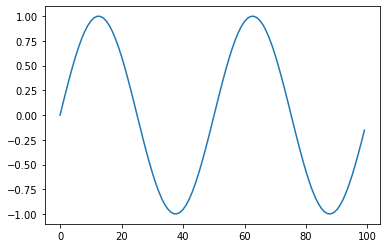

In [2]:
sr = 22050
nfft = 1024

# Make 440
w440 = librosa.tone(440, sr, duration =1.0)
print (w440.shape)
plt.plot(w440[:100])

# Load G3, G4, G5
w_G3, sr_in = librosa.core.load("G3.wav", sr=sr)
w_G4, sr_in = librosa.core.load("G4.wav", sr=sr)
w_G5, sr_in = librosa.core.load("G5.wav", sr=sr)
w_G3, w_G4, w_G5 = w_G3[:sr_in], w_G4[:sr_in], w_G5[:sr_in]
w_mix = np.concatenate((w_G3, w_G4, w_G5), axis=0)

_w_mix = librosa.core.resample(w_mix, sr_in, sr)


/Users/softcat/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/core/spectrum.py:1642: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  "amplitude_to_db was called on complex input so phase "
/Users/softcat/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/softcat/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/softcat/.pyenv/versions/3.7.0/lib/python3.7/site-packages/librosa/display.py:97

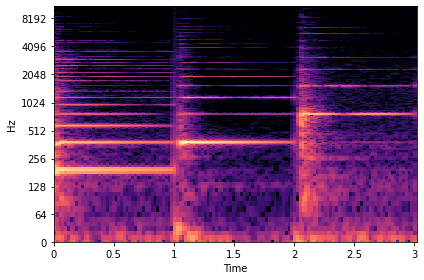

In [3]:
# STFT with log scale
D = librosa.stft(_w_mix)
librosa.display.specshow(librosa.amplitude_to_db(D,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', sr=22050)
plt.tight_layout()

In [4]:
# sr = 32000
# hop_size = 500 samples
# Q = 32 for f < G6(1568 8hz)
# Q = 64, else.
# waves, generated by softwares. p 429, L column, 3rd paragraph
#_w_vibrato = librosa.core.resample(w_vibrato, 22050, sr)

table_cqt = table2(sr, base_Q=34, verbose=False, fix_B=24)
cqt, freqs_cqt = mcqt(_w_mix, table=table_cqt, sr=sr, window_type="hamming")

mini = [table_cqt[i] for i in range(len(table_cqt)) if i % 6 ==0 ]
print(tabulate(mini, headers=["Channel(k)", "Frequency(Hz)", "Window(Samples)", "Window(ms)", "Q", "i-kmin"]))
print(cqt.shape)

  Channel(k)    Frequency(Hz)    Window(Samples)    Window(ms)    Q
------------  ---------------  -----------------  ------------  ---
           0           175                  4284           194   34
           6           208.11               3602           163   34
          12           247.49               3029           137   34
          18           294.31               2547           116   34
          24           350                  2142            97   34
          30           416.22               1801            82   34
          36           494.97               1515            69   34
          42           588.63               1274            58   34
          48           700                  1071            49   34
          54           832.44                901            41   34
          60           989.95                757            34   34
          66          1177.25                637            29   34
          72          1400                   536

/Users/softcat/Desktop/605_final/upload/Helper.py:277: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x, y, db_cqt, cmap='jet')
/Users/softcat/Desktop/605_final/upload/Helper.py:281: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


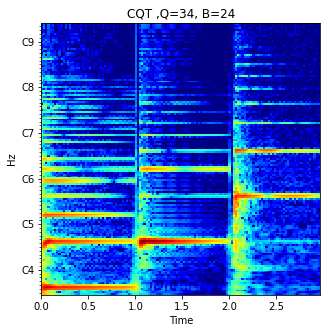

In [5]:
# Plot CQT
plotCqt(cqt, freqs_cqt, sr=sr, hop_size=512, title=",Q=34, B=24")

In [6]:
N = 4300
table_k = table2(sr=sr, verbose=False, base_Q=34, NFFT=N, fix_B=24)
table_k = tempKernel(N=N, table=table_k)
table_k = specKernel(N=N, table=table_k)

MINVAL=0.10
cqt_k, freqs_k = eq5(_w_mix, sr=sr, N=N, table=table_k, hop_size=512, MINVAL=MINVAL)
print (cqt_k.shape)

(144, 129)


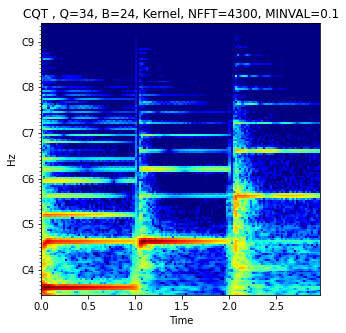

In [7]:
plotCqt(cqt_k, freqs_k, sr=sr, hop_size=512, title=", Q=34, B=24, Kernel, NFFT={}, MINVAL={}".format(N, MINVAL))

  Channel(k)    Frequency(Hz)    Discard %
------------  ---------------  -----------
           0           175           99.86
          15           269.89        99.77
          31           428.42        99.63
          47           680.07        99.44
          63          1079.55        99.12
          79          1713.67        99.3
          95          2720.29        98.88
         111          4318.19        98.23
         127          6854.7         97.21
         143         10881.2         96.37


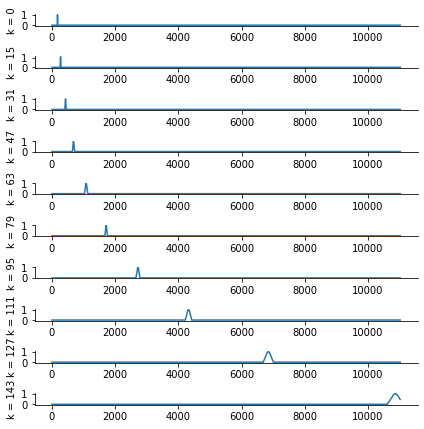

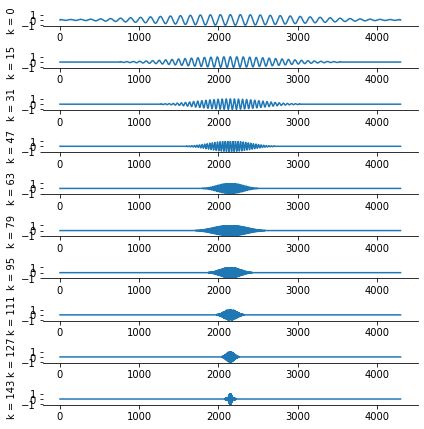

In [8]:
import warnings
warnings.filterwarnings('ignore')

plotKernel(table_k, 10, sr, table_k[0][-1].shape[0], False, MINVAL=MINVAL)
plotTemp(table_k, 10, sr, table_k[0][-1].shape[0], False, MINVAL=MINVAL)

  Channel(k)    Frequency(Hz)    Discard %
------------  ---------------  -----------
           0           175           95.52
           1           180.13        94.78
           2           185.41        94.78
           3           190.84        94.78
           4           196.43        94.78
           5           202.19        94.03
           6           208.11        94.03
           7           214.21        94.78
           8           220.49        94.78
           9           226.95        94.03
          10           233.6         94.03
          11           240.44        93.28


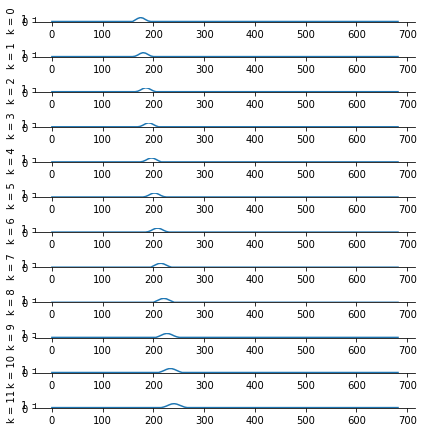

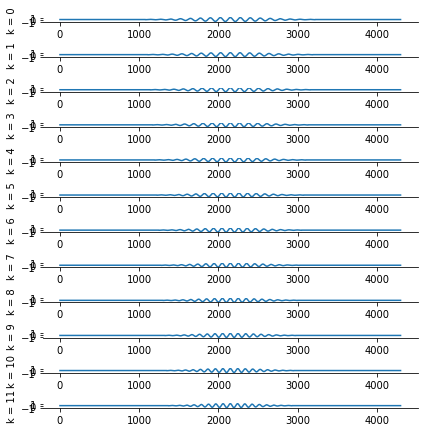

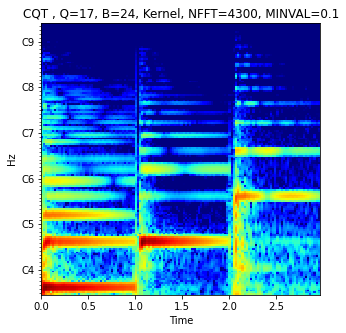

In [9]:
# Compare the filter in Q=17 and Q=34 with B=24. Width(Q=17) > Width(Q=34)
N=4300
t_q17_b24 = table2(sr, base_Q=17, verbose=False, fix_B=24, NFFT=N)
t_q17_b24 = tempKernel(N=N, table=t_q17_b24)
t_q17_b24 = specKernel(N=N, table=t_q17_b24)
cqt_q17_b24, freqs_q17_b24 = eq5(w_mix, sr=sr, N=N, table=t_q17_b24, hop_size=512)
plotKernel(t_q17_b24, 12, sr, N, True, 32)
plotTemp(t_q17_b24, 12, sr, N, True, 32)
plotCqt(cqt_q17_b24, freqs_q17_b24, sr=sr, hop_size=512, title=", Q=17, B=24, Kernel, NFFT={}, MINVAL={}".format(N, MINVAL))


  Channel(k)    Frequency(Hz)    Discard %
------------  ---------------  -----------
           0           175           97.76
           1           180.13        97.76
           2           185.41        97.76
           3           190.84        97.01
           4           196.43        97.01
           5           202.19        97.01
           6           208.11        97.01
           7           214.21        97.01
           8           220.49        96.27
           9           226.95        97.01
          10           233.6         97.01
          11           240.44        96.27


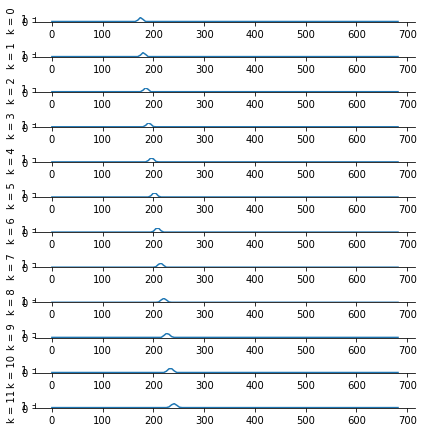

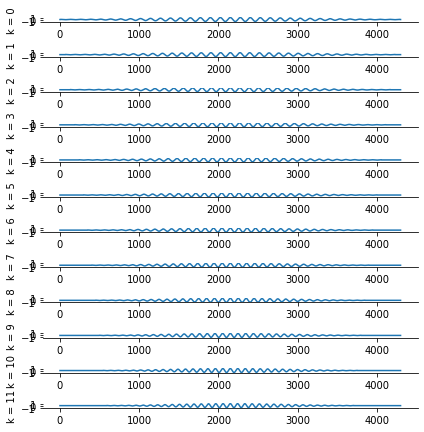

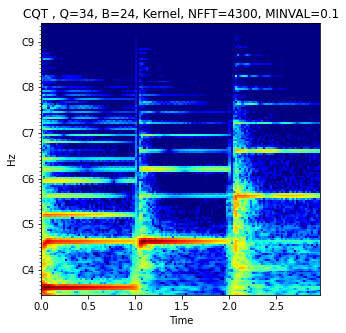

In [10]:
t_q34_b24 = table2(sr, base_Q=34, verbose=False, fix_B=24, NFFT=N)
t_q34_b24 = tempKernel(N=N, table=t_q34_b24)
t_q34_b24 = specKernel(N=N, table=t_q34_b24)
cqt_q34_b24, freqs_q34_b24 = eq5(w_mix, sr=sr, N=N, table=t_q34_b24, hop_size=512)
plotKernel(t_q34_b24, 12, sr, N, True, 32)
plotTemp(t_q34_b24, 12, sr, N, True, 32)
plotCqt(cqt_q34_b24, freqs_q17_b24, sr=sr, hop_size=512, title=", Q=34, B=24, Kernel, NFFT={}, MINVAL={}".format(N, MINVAL))

In [11]:
w_vibrato, sr_vibrato = librosa.core.load("violin_vibrato.wav", sr=sr)
print (w_vibrato.shape, sr)

(176400,) 22050


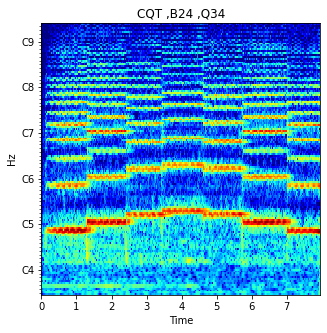

In [12]:
# Q34, B24
_N = 8600
t_q34_b24 = table2(sr, base_Q=34, verbose=False, fix_B=24, NFFT=_N)
t_q34_b24 = tempKernel(N=_N, table=t_q34_b24)
t_q34_b24 = specKernel(N=_N, table=t_q34_b24)
cqt_q34_b24, freqs_q34_b24 = eq5(w_vibrato, sr=sr, N=_N, table=t_q34_b24, hop_size=512)
plotCqt(cqt_q34_b24, freqs_q34_b24, sr=sr, hop_size=512, title=",B24 ,Q34")

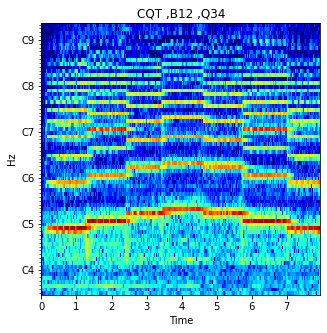

In [13]:
# Q17, B24
t_q34_b12 = table2(sr, base_Q=34, verbose=False, fix_B=12, NFFT=N)
t_q34_b12 = tempKernel(N=N, table=t_q34_b12)
t_q34_b12 = specKernel(N=N, table=t_q34_b12)
cqt_q34_b12, freqs_q34_b12 = eq5(w_vibrato, sr=sr, N=N, table=t_q34_b12, hop_size=512)
plotCqt(cqt_q34_b12, freqs_q34_b12, sr=sr, hop_size=512, title=",B12 ,Q34")

(45799,) 22050


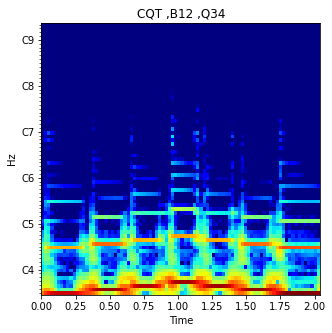

In [14]:
# Bass CQT
w_bass, sr = librosa.core.load("bass_f3.wav", sr=sr)
print (w_bass.shape, sr)

t_bass = table2(sr, base_Q=34, verbose=False, fix_B=12, NFFT=N)
t_bass = tempKernel(N=N, table=t_bass)
t_bass = specKernel(N=N, table=t_bass)
cqt_bass, freq_bass = eq5(w_bass, sr=sr, N=N, table=t_bass, hop_size=512)
plotCqt(cqt_bass, freq_bass, sr=sr, hop_size=512, title=",B12 ,Q34")

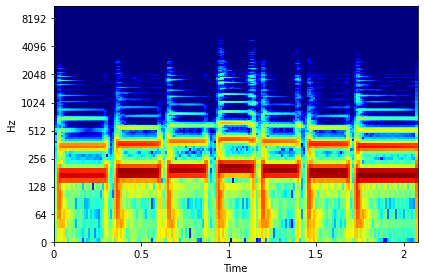

In [15]:
# Bass, stft
stft = librosa.stft(w_bass, 1024)

librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),
                         sr=sr, hop_length=1024//4, x_axis='time', y_axis='log', cmap='jet')
plt.tight_layout()